# Column Names and descriptions for King County Data Set
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  # of bedrooms
* **bathroomsNumber** - # of bathrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

### **The Stakeholder is Nicole Johnson**

He wants to buy a house with this criteria:
- The house in the lively and central neighborhood
- The house is middle price range
- He looks for the best time in a year to buy a house

In [5]:
# Import the libraries

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import stats

%matplotlib inline

ModuleNotFoundError: No module named 'matplotlib'

In [179]:
#Load the dataset into DataFrame

df = pd.read_csv("../data/King_County_House_prices_dataset.csv")
df.shape

(21597, 21)

# Manage Dataset

### 1. Check the missing values (NaN) from dataset, and replace them by value "0"

In [180]:
#check and count how many missing values in each column

print(df.isna().sum())

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64


In [181]:
#fill the NaN with 0
df.fillna(0, inplace=True)


### 2. Removing outlier

In [188]:
#removing outliers

var = df[["price", "bedrooms", "bathrooms", "sqft_living", "sqft_lot", "floors", "view", "condition" , "grade", "sqft_above", "sqft_living15", "sqft_lot"]]

import numpy as np
from scipy import stats
z = np.abs(stats.zscore(var))
z

df = df[(zscore < 3).all(axis=1)]

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6949 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             6949 non-null   int64         
 1   date           6949 non-null   datetime64[ns]
 2   month_n        6949 non-null   int64         
 3   month          6949 non-null   object        
 4   price          6949 non-null   float64       
 5   bedrooms       6949 non-null   int64         
 6   bathrooms      6949 non-null   float64       
 7   sqft_living    6949 non-null   int64         
 8   sqft_lot       6949 non-null   int64         
 9   floors         6949 non-null   float64       
 10  waterfront     6949 non-null   float64       
 11  view           6949 non-null   float64       
 12  condition      6949 non-null   int64         
 13  grade          6949 non-null   int64         
 14  sqft_above     6949 non-null   int64         
 15  sqft_basement  6949 

### 3. Convert date column into datetime format

In [182]:
df["date"] = pd.to_datetime(df["date"])

### 4. Create new columns with Month seperated

In [183]:
# create column month, with string
import calendar

df["month"] = df['date'].dt.month
df['month'] = df['month'].apply(lambda x: calendar.month_name[x])
df["month_n"] = df['date'].dt.month
df.head()

# change orders of index column, moving month next to date
df.columns
df = df[['id', 'date', "month_n", 'month', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']]
df.head()

,id,date,month_n,month,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,10,October,221900.0,3,1.00,1180,5650,1.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,12,December,538000.0,3,2.25,2570,7242,2.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,2,February,180000.0,2,1.00,770,10000,1.0,...,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,12,December,604000.0,4,3.00,1960,5000,1.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,2,February,510000.0,3,2.00,1680,8080,1.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


### Subset the houses data, only in the center neighborhood.
*fulfills the first criteria of Nicole's dream house*

Nicole wants a house in the lively areas and center neighborhood, I suggest him to pick one in the Seattle neighborhood.
Therefore, I filtered the house data using the Zipcodes from the central areas in Seattle.



In [194]:
seattle = [98101, 98102, 98103, 98104, 98105, 98106, 98107, 98108, 98109, 98112, 98115, 98116, 98117, 98118, 98119, 98121, 98122, 98125, 98126, 98133, 98134, 98136, 98144, 98146, 98154, 98164, 98174, 98177, 98178, 98195, 98199]

#Read more: http://www.city-data.com/zipmaps/Seattle-Washington.html

df.query("zipcode in @seattle", inplace=True)
df.shape 

(6949, 23)

## Exploratory Data Analysis

### Show the map of neighborhood that Nicole's future house will be located around 

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

<Figure size 1296x720 with 0 Axes>

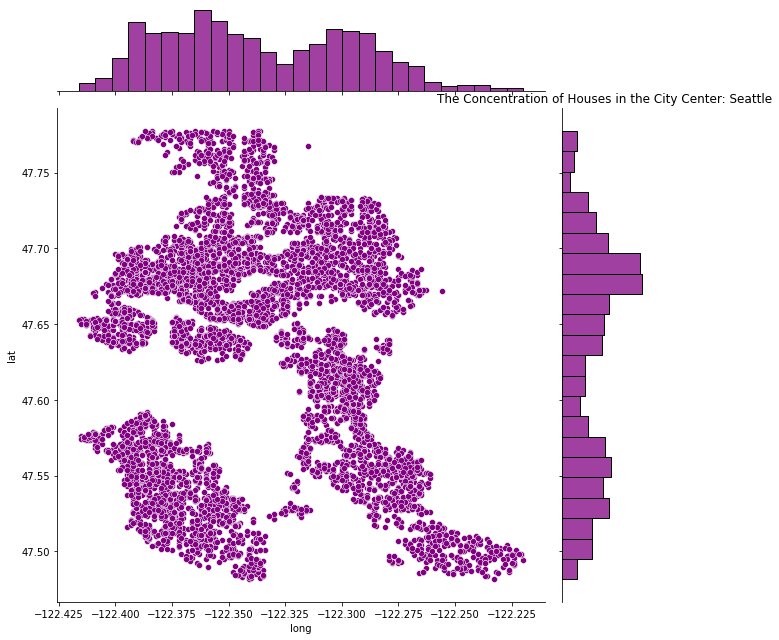

In [195]:
# map plotly (will figure it out later)


plt.figure(figsize=(18,10))

sns.jointplot(x=df.long, y=df.lat, size=9, color= "purple")
"""plt.ylabel('Latitude', fontsize=12)
plt.xlabel('Longtitude', fontsize=12)"""
plt.title("The Concentration of Houses in the City Center: Seattle")
sns.despine

In [186]:
# correlation plot with plotly

#convert values in dataframe df to correlation values
corr_df = df.corr(method="pearson")
print(corr_df.head(3))

               id   month_n     price  bedrooms  bathrooms  sqft_living  \
id       1.000000  0.005236 -0.022369 -0.005572  -0.028118    -0.025180   
month_n  0.005236  1.000000 -0.008574 -0.000221   0.023716     0.027870   
price   -0.022369 -0.008574  1.000000  0.331151   0.509410     0.746327   

         sqft_lot    floors  waterfront      view  condition     grade  \
id      -0.030684 -0.018504    0.034366  0.006159  -0.002277 -0.026502   
month_n -0.017089  0.024032    0.001079 -0.013670   0.039071  0.019005   
price    0.236377  0.239282    0.193069  0.413426   0.170749  0.693969   

         sqft_above  yr_built  yr_renovated   zipcode       lat      long  \
id        -0.025749 -0.035875     -0.000126 -0.082992 -0.010864  0.069546   
month_n    0.020478 -0.001504      0.017965 -0.006684  0.009436  0.012412   
price      0.709131 -0.064683      0.140829 -0.026705  0.171791 -0.024498   

         sqft_living15  sqft_lot15  
id           -0.038383   -0.029164  
month_n       0.014

In [196]:
import plotly.graph_objects as go

fig = go.Figure(go.Heatmap(
        x=corr_df.columns,
        y=corr_df.columns,
        z=corr_df.values.tolist(),
        colorscale='rdylgn', zmin=-1, zmax=1))

fig.update_layout(height=600, width=800, #ideally height= 1000, and width=800, it takes the notebook slower
                  title_text="House Features Influenced the Price")
fig.show()

## Plots - Single Linear Regression with OLS

In [210]:
import plotly.express as px

fig = px.scatter(
    df, x ='sqft_living', y='price', opacity=0.65,
    trendline='ols', trendline_color_override='darkblue'
)
fig.show()

In [207]:
import plotly.express as px

fig = px.scatter(
    df, x ='sqft_above', y='price', opacity=0.65,
    trendline='ols', trendline_color_override='darkblue'
)
fig.show()

In [208]:
import plotly.express as px

fig = px.scatter(
    df, x ='grade', y='price', opacity=0.65,
    trendline='ols', trendline_color_override='darkblue'
)
fig.show()

In [216]:
fig = px.bar(data_frame=df,
    x='grade', y='price',
    ='green")
fig.show()

SyntaxError: EOL while scanning string literal (<ipython-input-216-54ed244e530a>, line 3)

In [209]:
import plotly.express as px

fig = px.scatter(
    df, x ='bedrooms', y='price', opacity=0.65,
    trendline='ols', trendline_color_override='darkblue'
)
fig.show()

## Modeling - Multi Linear Regression with OLS

In [51]:
# import library for modeling
import statsmodels.api as sms
from sklearn.model_selection import train_test_split

# pick more explanatory Features for modeling
features = df_[["bedrooms", "bathrooms", "floors", "view", "sqft_living", "grade", "sqft_above", "sqft_living15"]]
response = df_["price"]

X = features
X = sms.add_constant(X)
y = response

# split the train and text data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.02, random_state= 101)


#create the OLS model for multiple X-variables
model = sms.OLS(y_train, X_train)
results = model.fit()
#results.summary()

y_pred = results.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error
# Evaluating Model's Performance
print('Mean Absolute Error:', round(mean_absolute_error(y_test, y_pred)))



Mean Absolute Error: 115057


* NO Idea, to include later maybe *
### Subset the houses data, only whose prices are in the middle range.
*fulfills the second criteria of Nicole's dream house*

Nicole wants a house that perfectly meets his budget. He wants the house in the middle range price. Neither too expensive nor too cheap. Hence, I grab the houses whose price ranged around the median price (either 20% cheaper or 20% higher than median price), so he can have more preferences to chose the right house with reasonable price for his budget.

In [3]:
nicole = df.groupby(["bedrooms", "bathrooms", "floors", "view", "sqft_living", "grade", "sqft_above", "sqft_living15"]).["price"].median()

SyntaxError: invalid syntax (<ipython-input-3-18b596193e39>, line 1)

In [6]:
df.groupby(["bedrooms", "bathrooms", "floors", "view", "sqft_living", "grade", "sqft_above", "sqft_living15"])[['price']].agg(query("price >= price.quantile(0.3) and price <= price.quantile(0.7)"))

NameError: name 'df' is not defined

## Predict the best time to buy the House

## Conclusion for Nicole

In [ ]:
# What kind of house Nicole can afford. How many rooms, size, views, and other facilities Nicole can get with his budget